In [1]:
! #pip3 install -r ./requirements.txt

In [2]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from FileCounter import fileCount
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms.functional as F
import numpy as np

import cv2

In [23]:
train = fileCount('ASL-alphabet_processed/asl_alphabet_train/A')
test = fileCount('ASL-alphabet_processed/asl_alphabet_test/A')
print(f"Images per class \n Train: {train} \n Test: {test}")

Images per class 
 Train: 2500 
 Test: 501


In [4]:
trainData = 'ASL-alphabet_processed/asl_alphabet_train'
testData = 'ASL-alphabet_processed/asl_alphabet_test'

In [5]:
train_transforms =  transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((100, 100)),
    # transforms.RandomVerticalFlip(p=0.4),
    transforms.RandomPerspective(distortion_scale=0.1, p=0.5),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=15),
    transforms.ToTensor(),
    
])

test_transforms = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((100, 100)),
    transforms.ToTensor(),    
])

train_dataset = datasets.ImageFolder(trainData, transform=train_transforms)
test_dataset = datasets.ImageFolder(testData, transform=test_transforms)

In [22]:
class_to_idx = train_dataset.class_to_idx

for class_label, numeric_value in class_to_idx.items():
    print(f"Class Label: {class_label}, Numeric Value: {numeric_value}")

Class Label: A, Numeric Value: 0
Class Label: B, Numeric Value: 1
Class Label: C, Numeric Value: 2
Class Label: D, Numeric Value: 3
Class Label: E, Numeric Value: 4
Class Label: F, Numeric Value: 5
Class Label: G, Numeric Value: 6
Class Label: H, Numeric Value: 7
Class Label: I, Numeric Value: 8
Class Label: J, Numeric Value: 9
Class Label: K, Numeric Value: 10
Class Label: L, Numeric Value: 11
Class Label: M, Numeric Value: 12
Class Label: N, Numeric Value: 13
Class Label: O, Numeric Value: 14
Class Label: P, Numeric Value: 15
Class Label: Q, Numeric Value: 16
Class Label: R, Numeric Value: 17
Class Label: S, Numeric Value: 18
Class Label: T, Numeric Value: 19
Class Label: U, Numeric Value: 20
Class Label: V, Numeric Value: 21
Class Label: W, Numeric Value: 22
Class Label: X, Numeric Value: 23
Class Label: Y, Numeric Value: 24
Class Label: Z, Numeric Value: 25
Class Label: del, Numeric Value: 26
Class Label: nothing, Numeric Value: 27
Class Label: space, Numeric Value: 28


In [6]:
test_dataset[3]

(tensor([[[1.0000, 0.9961, 1.0000,  ..., 0.1412, 0.1255, 0.0824],
          [0.9451, 0.6078, 0.5020,  ..., 0.8745, 0.8275, 0.7137],
          [0.9804, 0.4549, 0.0039,  ..., 0.9961, 0.9373, 0.7333],
          ...,
          [0.1451, 0.8745, 0.9961,  ..., 0.9922, 0.8706, 0.1961],
          [0.1451, 0.8745, 0.9333,  ..., 0.8706, 0.8588, 0.6275],
          [0.1451, 0.8706, 0.7333,  ..., 0.1961, 0.6275, 0.2706]]]),
 0)

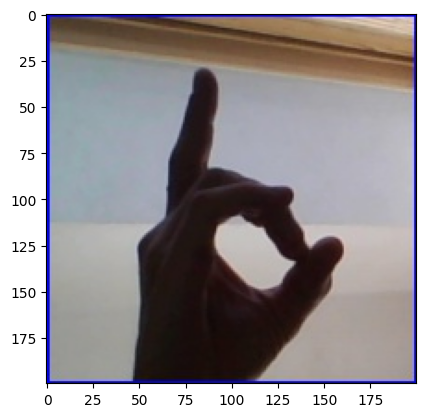

In [7]:
image = cv2.imread("asl-alphabet/asl_alphabet_test/asl_alphabet_test/D/D_test.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

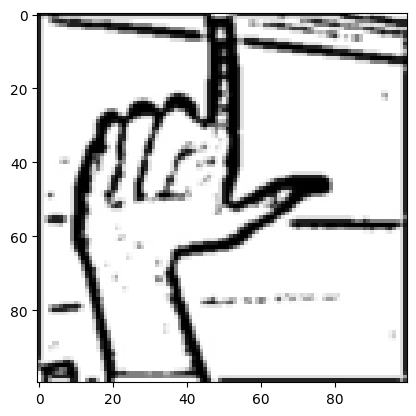

11


In [8]:
image, label = test_dataset[6000]
image = image.squeeze().numpy()  # Remove the single-channel dimension

plt.imshow(image, cmap='gray')
plt.show()
print(label)

In [9]:
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)

testloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 12 * 12, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 29)
        self.dropout = nn.Dropout(0.6)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

[1,  1000] loss: 3.369
[1,  2000] loss: 3.294
[1,  3000] loss: 2.963
[1,  4000] loss: 2.738
Epoch [1] - Loss: 0.302, Accuracy: 10.52 %
[2,  1000] loss: 2.445
[2,  2000] loss: 2.272
[2,  3000] loss: 2.154
[2,  4000] loss: 2.046
Epoch [2] - Loss: 0.233, Accuracy: 29.94 %
[3,  1000] loss: 1.927
[3,  2000] loss: 1.853
[3,  3000] loss: 1.789
[3,  4000] loss: 1.688
Epoch [3] - Loss: 0.193, Accuracy: 40.81 %
[4,  1000] loss: 1.625
[4,  2000] loss: 1.563
[4,  3000] loss: 1.518
[4,  4000] loss: 1.469
Epoch [4] - Loss: 0.169, Accuracy: 48.48 %
[5,  1000] loss: 1.391
[5,  2000] loss: 1.362
[5,  3000] loss: 1.319
[5,  4000] loss: 1.283
Epoch [5] - Loss: 0.148, Accuracy: 54.49 %
[6,  1000] loss: 1.232
[6,  2000] loss: 1.186
[6,  3000] loss: 1.182
[6,  4000] loss: 1.148
Epoch [6] - Loss: 0.131, Accuracy: 59.24 %
[7,  1000] loss: 1.082
[7,  2000] loss: 1.070
[7,  3000] loss: 1.076
[7,  4000] loss: 1.042
Epoch [7] - Loss: 0.119, Accuracy: 63.46 %
[8,  1000] loss: 0.997
[8,  2000] loss: 0.974
[8,  3000

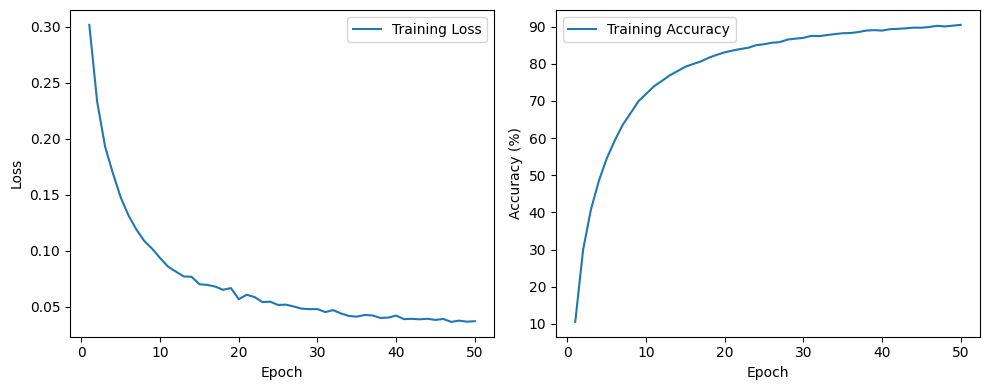

In [11]:
net = CNN()
# Move model and data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
# Step 4: Train the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.00025)

train_loss_history = []
train_accuracy_history = []

for epoch in range(50):
    net.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)  # move data to GPU

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Compute running loss and accuracy
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
    # Compute and store the average loss and accuracy for the epoch
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)

    print('Epoch [%d] - Loss: %.3f, Accuracy: %.2f %%' % (epoch + 1, epoch_loss, epoch_accuracy))


    if epoch % 5 == 0:  # Visualize activation maps every few epochs
        sample_inputs, _ = next(iter(trainloader))  # Get a batch of input samples
        sample_inputs = sample_inputs.to(device)  # Move inputs to the same device as the model

        activation = net.conv1(sample_inputs)  # Pass the inputs through the 'conv1' layer
        activation = torch.mean(activation, dim=1, keepdim=True)  # Take the mean across channels
        activation_map = F.to_pil_image(activation[0].detach().cpu())  # Convert tensor to PIL image
        # Save the activation map as an image file
        activation_map.save(f'activation_map_epoch_{epoch}.png')
print('Finished Training')

# Plot the loss and accuracy curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy_history) + 1), train_accuracy_history, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

Accuracy of the network on the test images: 94 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      0.99      1.00       501
           2       1.00      1.00      1.00       501
           3       1.00      1.00      1.00       501
           4       0.98      1.00      0.99       501
           5       0.98      1.00      0.99       501
           6       0.97      0.99      0.98       501
           7       0.98      0.96      0.97       501
           8       1.00      0.63      0.78       501
           9       0.95      1.00      0.97       501
          10       0.97      0.88      0.92       501
          11       0.96      0.94      0.95       501
          12       0.89      0.79      0.84       501
          13       0.88      0.91      0.89       501
          14       1.00      1.00      1.00       501
          15       0.99      0.98      0.98       501
         

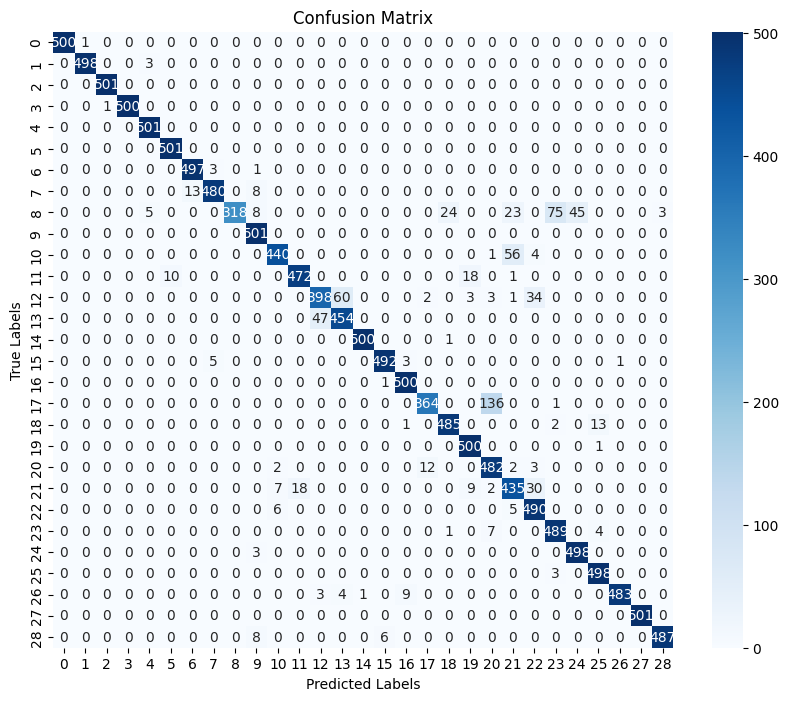

In [12]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

net.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)  # move data to GPU
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Calculate classification report
report = classification_report(true_labels, predicted_labels)

# Print the confusion matrix and classification report
# print('Confusion Matrix:')
# print(confusion_mat)
print('Classification Report:')
print(report)

# Visualize the confusion matrix
class_names = [str(i) for i in range(29)]  # Replace with your class names

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


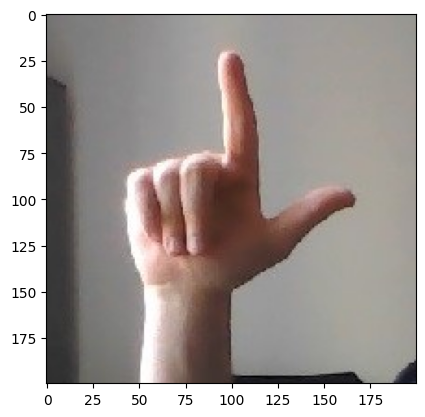

In [13]:
image = cv2.imread("myexample.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

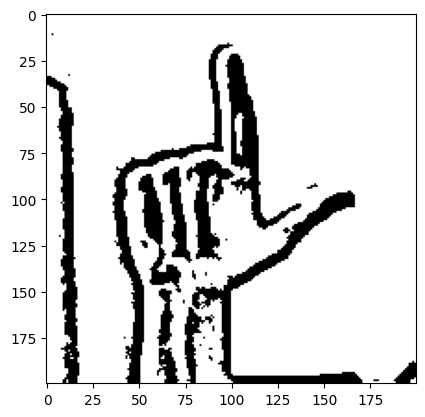

In [14]:
image = plt.imread('myexample.jpg')

# Apply the segmentation operations (Gaussian blur, grayscale conversion, morphological operations, thresholding)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
adaptive_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, adaptive_kernel)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, adaptive_kernel)
thresholded_image = cv2.adaptiveThreshold(closed_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)

plt.imshow(thresholded_image, cmap='gray')
plt.show()

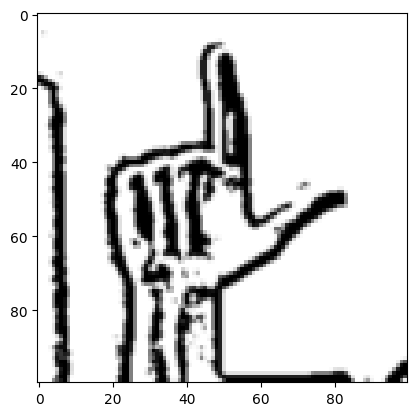

In [15]:
example_image_pil = transforms.ToPILImage()(thresholded_image)
# Apply the transformation to the example image
transformed_img = test_transforms(example_image_pil)


transformed_img_plot = transformed_img.squeeze().numpy()  # Remove the single-channel dimension


# Visualize the augmented image
plt.imshow(transformed_img_plot, cmap='gray')
plt.show()


In [16]:
net.eval()
image = transformed_img.to(device)
outputs = net(image)
_, predicted = torch.max(outputs.data, 1)
predicted

tensor([11], device='cuda:0')